# Сравнение open-source солверов и их применение в ритейле

Привет, Habr! На связи отдел аналитики данных X5 Tech.

Сегодня мы поговорим об очень интересном разделе прикладной математики — оптимизации.

Практически каждый человек ежедневно решает оптимизационные задачи даже не задумываясь об этом.
Например, мы, как правило, хотим минимизировать наши расходы для приобретения необходимых товаров, но при условии, чтобы эти товары были максимально полезны.
Полезность здесь у каждого своя — для одних она определяется количеством растительных жиров, для других — наличием привычных товаров, и тд.
Другой пример — мы хотим распределить свой маршрут в отпуске так, чтобы посетить всё, что запланировали с минимальными временными затратами на дорогу, и при этом не забыть почилить на пляже.

Бизнес требования часто сводятся к задаче многокритериальной оптимизации и задаче оптимального управления.
В таких постановках решения, найденные методами оптимизации, чрезвычайно полезны для принятия решений.
Приведём для иллюстрации несколько задач из области ритейла.

**Оптимальное распределение маркетингового бюджета**

Реализовать максимально эффективно выделенный на маркетинговые активности бюджет.
Есть несколько каналов для рекламных акций, выделенный бюджет, цель — максимально выгодно инвестировать бюджет,
чтобы суммарный доход со всех коммуникаций был максимален.
Также необходимо учесть бизнес ограничения на нагрузку каждого канала + частоту взаимодействия.

**Планирование ассортимента**

Подобрать уровни ассортимента мерчгрупп так, чтобы максимизировать оборот с учетом полочного пространства, выделенного на мерчгруппу.

**Закупка товаров**

Задача — распределить бюджет, выделенный на закупки, для поддержания товарооборота, достаточного уровня сервиса,
и при этом достигнуть определенных финансовых показателей под выделенный бюджет на закупки.

**Ценообразование**

Поиск оптимальной конфигурации цен с учетом ценового позиционирования, допустимых ценовых диапазонов для каждого товара и набора бизнес-ограничений. Цены должны максимизировать суммарный доход, а прибыль быть не ниже на заданного уровня.



Для формулировки оптимизационной задачи требуется ___качественная___ бизнес-экспертиза, чтобы определить, что хотим максимизировать/минимизировать, какие условия надо соблюдать и т.п.
Это весьма трудоёмкий по времени процесс, из-за чего подробное изучение инструментов решения сформулированных задач зачастую пропускается.
Нам на практике встречались даже реализации в Excel, что для MVP решения является приемлемым подходом, но при дальнейшем масштабировании задачи, необходимо искать более оптимальное и желательно бесплатное решение.

В этой статье мы рассмотрим несколько открытых солверов, сравним их возможности и скорость работы на модельной задаче ценообразования.


## Общая постановка задачи и её разновидности


Прежде всего рассмотрим постановку задачи в общем виде:

$x$ - вектор размерности $n$, $x \in X$ - допустимое множество значений этих переменных.

$f(x) \to \min(\max)$, $f(\cdot)$ - целевая функция

$g_i(x) \leqslant 0, \ i=1..m$ - ограничения вида неравенств

$h_i(x) = 0, \ j=1..k$ - ограничения вида равенств

Исходя из практики можно разложить данную постановку на несколько классов в зависимости от вида целевой функции, ограничений и $X$:

* __Безусловная оптимизация__ $g_i(x), h_j(x)$ - отсутствуют, $X = \mathbb{R}^n$;

* __LP__ (linear programming) - линейное программирование. $f(x), g_i(x), h_j(x)$ - линейные функции, $X = \mathbb{R}_+^n$;

* __MILP__ (mixed integer linear programming) - смешанное целочисленное линейное программирование, это задача LP в которой только часть переменных являются целочисленными;

* __NLP__ (nonlinear programming) - нелинейное программирование, возникает когда хотя бы одна из функций $f(x),\ g_i(x),\ h_j(x)$ нелинейна;

* __MINLP__ (mixed integer nonlinear programming) - смешанное целочисленное нелинейное программирование, возникает как и в MILP, когда часть переменных принимает целочисленные значения;

__NLP__ в свою очередь можно подробить еще на множество разных классов в зависимости от вида нелинейности и наличия/отсутствия выпуклости.


## Обзор пакетов python


Рассмотрим open-source пакеты и солверы для решения задач условной оптимизации в зависимости от ее типа, которые часто можно встретить в практических задачах.

### Открытые библиотеки, предоставляющие интерфейс для решения оптимизационных задач


[__Scipy__](https://scipy.org/) - библиотека, которая содержит большой набор функций для научных вычислений,
в том числе имеет инструменты для решения оптимизационных задач, находящиеся в модуле scipy.optimize.
В модуле находятся методы для решения задач линейного программирования, нелинейного программирования (как условного, так и безусловного).
В документации [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) можно найти,
что условную оптимизацию с нелинейностью поддерживают __cobyla__, __slsqp__, __trust-constr__,
также там можно найти краткое описание методов и ссылки на статьи, также обзор солверов в [статье на хабре](https://habr.com/ru/company/ods/blog/448054/)

[__Pyomo__](http://www.pyomo.org/) - пакет, который содержит ряд инструментов для формулирования, решения и анализа оптимизационных моделей.
Главная особенность — это удобный интерфейс для структурированного формулирования оптимизационной задачи и поддержка большого количества солверов, в том числе коммерческих.
По сути pyomo занимается “перевариванием” сформулированной модели в формат, понятный для запускаемого солвера, потом забирает его и передает в интерфейс python.
Является частью проекта [COIN-OR](https://www.coin-or.org/), который содержит также ряд солверов.
Среди них можно выделить [Ipopt](https://github.com/coin-or/Ipopt), [Cbc](https://github.com/coin-or/Cbc).
Ipopt позволяет находить локальные оптимумы в задаче NLP с помощью прямо-двойственного метода внутренней точки, подробнее в оригинальной [статье](http://www.optimization-online.org/DB_HTML/2004/03/836.html).
В Cbc реализован метод решения задачи MILP, основанный на алгоритме, сочетающем в себе метод ветвей и границ и секущих плоскостей [wiki](https://en.wikipedia.org/wiki/Branch_and_cut).
Также для LP имеется поддержка пакета [glpk](https://en.wikipedia.org/wiki/GNU_Linear_Programming_Kit).
И напоследок отметим еще один солвер [bonmin](https://github.com/coin-or/Bonmin), который построен поверх __Cbc__ и __Ipopt__ - сочетание двух солверов,
позволяющее браться за задачи __MINLP__.

[__Cvxpy__](https://www.cvxpy.org/index.html) - данный пакет специально заточен для решения задач выпуклой оптимизации (convex optimization).
После того как задача сформулирована, перед решением проверяется выпуклость и аффинность целевой функции и ограничений с помощью правил [DCP](https://www.cvxpy.org/tutorial/dcp/index.html)
(disciplined convex programming), после проверки задача преобразуется в стандартную форму и передается квадратичному или коническому солверу.
Полный список солверов и решаемых задач, с их помощью можно найти [здесь](https://www.cvxpy.org/tutorial/advanced/index.html).

Итого можно сформировать таблицу с открытыми библиотеками в python, солверами и видами задач, которые они могут решать:

|  Пакеты в python  |     Солвер(метод)    | NLP | LP | MILP | MINLP |
|-------------------|----------------------|-----|----|------|-------|
| scipy             | cobyla               | y   | n  | n    | n     |
| scipy             | slsqp                | y   | n  | n    | n     |
| scipy             | trust-constr         | y   | n  | n    | n     |
| pyomo             | ipopt                | y   | y  | n    | n     |
| pyomo, cvxpy      | glpk                 | n   | y  | y    | n     |
| pyomo, cvxpy      | cbc                  | n   | y  | y    | n     |
| cvxpy             | ecos                 | y   | y  | y    | n     |
| pyomo             | bonmin               | y   | y  | y    | y     |


## Модельная задача оптимизации в ценообразовании

Как уже было сказано выше, одной из основных целей ценообразования может быть формирование таких цен, которые:

* Соответствуют некоторому набору правил, бизнес-логике и т.п.

* Позволяют достигать определенных целей, например, повышение прибыли или оборота, без просадки в других показателях.

Первый пункт по сути задает диапазон, в котором производится поиск новой цены, возможные соотношения между ценами на товары,
соотношения цен с ценами конкурентов, условия на (не)изменение цены.

Второй задает нам целевой функционал для задачи оптимизации и набор ограничений, которые контролируют остальные показатели.

### Обозначения и сокращения

Введем обозначения:

$n$ - количество товаров,

$n'$ - количество продуктовых линеек,

$C_i$ - себестоимость товара $i$,

$Q$ - спрос по новой цене $P$,

$Q_0$ - спрос по текущей цене $P_{0}$,

$R = P \cdot Q$ - выручка,

$M = (P - C) \cdot Q$ - маржа,

$E$ - коэффициент эластичности (отклик).

$\gamma$ - набор индексов товаров, находящихся в одной линейке, $\gamma_{j}$ - $j-$ая линейка,
в которой $m_j$ товаров, $\gamma_{j, k}$ - $k$-ый индекс в $j$-ой линейке.


### Модель

__Рассмотрим следующую постановку задачи__:

Необходимо поднять выручку, при условии, что маржа не должна просесть, т.е. оставаться на уровне не ниже текущей в абсолютном выражении.

При этом необходимо соблюдать следующие ценовые границы:
$\pm 10$% от текущей цены, $\pm 15$% от среднерыночной цены, если диапазоны накладываются,
то финальный диапазон — пересечение, в противном случае отклонение от рынка не рассматривается, остается только отклонение от текущей цены.
Также необходимо обеспечивать равенство цен товаров, находящихся в одной линейке товаров (товары, которые отличаются только вкусом).
И в конце не забыть, что цена должна быть формата x.99.

Чтобы начать решать задачу, требуется знать отклик изменения спроса на изменение цены.
Здесь мы не будем отдельно останавливаться на том как оценивать этот отклик, будем считать что он задан в следующем виде:

\begin{equation}
\tag{1.1}
Q(P) = Q_{0} \exp\bigg(E \cdot \bigg(\frac{P}{P_0} - 1\bigg)\bigg).
\end{equation}

Обозначив $\cfrac{P}{P_0}$ через $x$, функцию спроса можно переписать в следующем виде:

\begin{equation}
\tag{1.2}
Q(x) = Q_0 \exp(E \cdot (x-1))
\end{equation}

Можно сформулировать поставленную задачу как задачу __NLP__ или __LP__, рассмотрим оба варианта.


### __NLP__ постановка задачи


$$
x \in \mathbb{R} ^ n
$$

\begin{equation}
\tag{2.1}
R(x) = \sum_{i=1}^{n} P_i \cdot Q_i(x_i) = \sum_{i=1}^{n} P_{0, i} \cdot x_{i} \cdot Q_{0, i} \exp{(E_i\cdot(x_i-1))} \to \max_{x}
\end{equation}

\begin{equation}
\tag{2.2}
x_i \in [x_{l, i}, x_{u, i}], \ i=1..n
\end{equation}

\begin{equation}
\tag{2.3}
M(x) = \sum_{i=1}^{n} (P_i - C_i) \cdot Q_i(x_i) = \sum_{i=1}^{n} (P_{0, i} \cdot x_{i} - C_{i}) \cdot Q_{0, i} \exp{(E_i\cdot(x_i-1))} \geqslant M_0
\end{equation}

\begin{equation}
\tag{2.4.1}
x_{\gamma_{j, 1}} = x_{\gamma_{j, 2}} = ... = x_{\gamma_{j, m_j}}, \ j=1..k
\end{equation}

Ограничение (2.4.1) линейно, его можно записать в матричной форме, так как чаще всего оптимизаторы принимают линейные ограничения именно в таком виде:

\begin{equation}
\tag{2.4.2}
A \cdot x = 0, 
\end{equation}
В A все элементы матрицы нулевые, кроме
\begin{equation}
\ A(\gamma_{j,1}, \gamma_{j, 1}) = -A(\gamma_{j, 1}, \gamma_{j, 2}) = 1,\ ..\ , A(\gamma_{j,m_j-1}, \gamma_{j, m_j-1}) = -A(\gamma_{j, m_j-1}, \gamma_{j, m_j}) = 1, \ j=1..k
\end{equation}

(2.1) - это целевой функционал, (2.2) - ценовой диапазон, в котором ищется цена для каждого товара, (2.3) - ограничение на маржу снизу, (2.4.1), (2.4.2) - описывает равенство цен в линейках,
 здесь используются $x$, так как подразумевается, что текущая цена является одинаковой во всей линейке.
В данной постановке $M_0$ - это текущее значение маржи:

\begin{equation}
M_0 = \sum_{i=1}^{n} (P_{0, i} - C_{0, i}) \cdot Q_{0, i} 
\end{equation}


Цена, которая будет пересчитана по (1.2) является непрерывной из диапазона (2.2), поэтому после необходимо округлить эти цены.
Конечно, округление несколько поломает "оптимальность".


### __MILP__ постановка задачи


Преимуществом данного подхода является то, что цены можно сразу искать по сетке, которые удовлетворяют ограничению (2.2) и правилам округления.
Например, если текущая цена 99.99, то сетка цен может быть такой $\hat{P}$ = [89.99; 90.99; ... 108.99; 109.99], всего 21 значение,
новую цену можно закодировать бинарной маской длиной 21 с одной единичкой, этого можно добиться введя переменную - бинарный вектор длины 21 $\hat{x}$,
у которого сумма всех элементов равна 1: $sum(\hat{x}) = 1$, тогда точно будет выбрана одна цена.
Для каждой цены необходимо получить сетку значений продаж $\hat{Q}$, при этом в общем случае нет необходимости в наличии аналитической функции спроса,
$\hat{Q}$ можно брать хоть из бустинга или какого-нибудь другого "черного ящика".
Что касается линеек, можно было бы ввести дополнительные ограничения на равенство $\hat{x}$ по аналогии с (2.4.1),
но намного проще и дешевле схлопнуть $\hat{Q}$ по линейкам, так как цены внутри них будут искаться по одной и той же сетке и поиск, соответственно, производить по линейкам.

Итого, чтобы сформулировать задачу, нужно:
* сформировать сетку цен $\hat{P}_i$ размера $g_i$ для каждого товара $i$, которые удовлетворяют граничным условиям и правилам округления
* задать бинарный вектор $\hat{x}_i$ 
* посчитать уровень спроса $\hat{Q}_i$ для сетки цен $\hat{P}_i$
* схлопнуть $\hat{Q}_i$ по линейкам, взяв сумму

Обозначим за $n'$ - количество линеек.

Таким образом, получим такую постановку:


\begin{equation}
\tag{3.1}
\hat{x}_i \in \{0, 1\}^{g_i},\ i=1..n'
\end{equation}

\begin{equation}
\tag{3.2}
R(\hat{x}) = \sum_{i=1}^{n'} \sum_{j=1}^{g_i} \hat{P}_{i, j} \cdot \hat{Q}_{i, j} \cdot \hat{x}_{i, j}
\end{equation}

\begin{equation}
\tag{3.3}
\sum_{j=1}^{g_i} \hat{x}_{i, j} = 1,\ i=1..n'
\end{equation}

\begin{equation}
\tag{3.4}
M(\hat{x}) = \sum_{i=1}^{n'} \sum_{j=1}^{g_i} (\hat{P}_{i, j} - C_i) \cdot \hat{Q}_{i, j} \hat{x}_{i, j} \geqslant M_0
\end{equation}

### __MINLP__ постановка задачи


Выше мы писали, что есть задача MINLP - это та, в которой часть переменных принимают целочисленные значения. Как они могут возникнуть в ценообразовании? Если мы захотим каким-то образом управлять количеством цен к изменению, то непрерывной оптимизицией уже не обойдешься, нужно включать некоторые дискретные правила. Допустим, что мы не хотим менять цену менее чем на $\varepsilon$ = 2% относительно текущей, то есть по сути говорим, что цена должна меняться как минимум на $\varepsilon$ или совсем не меняться, т.е. по такому правилу, если текущая цена - 100р., то цена должна быть либо в диапазоне [90; 98] либо [102; 110] либо оставаться неизменной. То есть наше множество, на котором мы ищем решение перестало быть непрерывным, для описания введем бинарные индикаторы того, на каком интервале происходит поиск:
$y_{i}^{(l)}$, $y_{i}^{(m)}$, $y_{i}^{(r)}$ - в левом , цена не поменялась, в провом, соответственно. Тогда количеством цен к изменеию можно управлять через сумму индикаторов "цена не поменялась" - не меньше чем заданное число - $n-d$, здесь $d$ максимальное количество цен к изменению. Индикаторы в задачах MILP(MINLP) можно задавать с помощью так называемого метода big-M(в нашем случае обозначим M за K) - введение дополнительного слагаемого $K \cdot y $ к ограничениям, которое при $y = 1$ позволяет нарушить ограничение и, соответственно, зафиксировать этот момент. Запишем как может выглядеть описание ограничения выше: 

\begin{equation}
y_{i}^{(l)}, y_{i}^{(m)}, y_{i}^{(r)} \in \{0, 1\}, \ i=1..n
\end{equation}

\begin{equation}
\tag{2.5.1}
y_{i}^{(l)} + y_{i}^{(m)} + y_{i}^{(r)} = 1
\end{equation}

\begin{equation}
\tag{2.5.2}
x_{i} - (1 - \varepsilon) <= K \cdot (1 - y_{i}^{(l)}),
\end{equation}

\begin{equation}
\tag{2.5.3}
x_{i} - (1 + \varepsilon) >= -K \cdot (1 - y_{i}^{(r)}),
\end{equation}

\begin{equation}
\tag{2.5.4}
x_{i} - 1 <= K \cdot (1 - y_{i}^{(m)}),
\end{equation}

\begin{equation}
\tag{2.5.5}
x_{i} - 1 >= -K \cdot (1 - y_{i}^{(m)}), \ i = 1..n,
\end{equation}

\begin{equation}
\tag{2.5.6}
\sum_{i=1}^{n} y_{i}^{(m)} \geqslant n - d
\end{equation}



Первая строчка говорит нам от том, что должен сработать ровно один индикатор. Перебором несложно убедиться, что система выше является непротиворечивой и по сути задает область поиска переменной $x_{i}$. Действительно, пусть сейчас $y^{(l)} = 1$, тогда $y^{(m)} = y^{(r)} = 0$ и ограничения (2.5.2)-(2.5.5) при подстановке после несложных преобразований примут вид: 
$$x \leqslant (1 - \varepsilon),\\
x \geqslant (1+\varepsilon) - K, \\
x \leqslant 1 + K, \\
x \geqslant 1 - K
$$
Выбрав $K$ - достаточно большим числом, можно убедиться, что окончательный диапазон будет $x \leqslant (1 - \varepsilon)$, что как раз соответствует тому, что мы хотели от $y^{(l)}$. Отдельно отметим (2.5.4) и (2.5.5) - они описывают равенство текущей цены при срабатывании $y^{(m)}$. 

Как мы видим, в случае MINLP постановки задачи сразу вырастает количество переменных и ограничений, необхолимых для описания дискретных правил, можно ожидать что вместе с этим вырастает и вычислительная сложность, т.е. скорость решения такой задачи. Намного гармоничнее эти правила укладываются в MILP постановку задачу: Дополним задачу (3) ограничением на общее количество изменений цены.
Его проще всего сформулировать через количество неизменяемых цен, для этого нужно иметь индекс текущей цены в сетке $p_{i}$ для $i$-ой линейки,
если, конечно, он там есть, обозначим это индикатором $I[p_{i} \in g_{i}]$ - равен единичке, если текущая цена в сетке и ноль противном случае:

\begin{equation}
\tag{3.5}
\sum_{i=1}^{n'} I |\gamma_{i}| \hat{x}_{i, p_{i}} \geqslant n - d
\end{equation}

Здесь $|\gamma_{i}|$ - размер $i$-ой линейки.

Задачу MINLP может решать bonmin в pyomo, дополним вызов оптимизатора добавлением ограничения на количество изменяемых цен сверху add_con_chg_cnt,
которое опишем в классе [PyomoNlpOptimizationModel](https://github.com/mbudylin/OptimizersArticle/blob/5a2f2de447411ee7d5663774f8870b05379451b0/optimizers/optimizers.py#L141).


## Описание подхода к решению оптимизационной задачи

Решение задач будем производить с помощью библиотек и солверов, указанных выше.
Slsqp, cobyla, trust-constr из scipy, ipopt из pyomo - будут использованы для решения задачи с непрерывными переменными (2.\*).

Cobyla не поддерживает ограничения типа равенства, коими здесь являются (2.4.1), но это не помешает нам, так как это ограничение просто равенство переменных,
а значит внутри группы можно задать всего одну переменную — она будет общей для линейки.
То же самое можно сделать и для всех остальных NLP солверов из scipy, а вот в pyomo можно явно задать равенство переменных, так в процессе подготовки он сам сделает замену на одну переменную.

Что касается cvxpy, то несложно увидеть, что исходный функционал не является выпуклым.
Более того, в общем случае, исходя из логических соображений можно прикинуть, что при увеличении цены спрос и вместе с ним выручка будут асимптотически падать до нуля,
а при уменьшении цены ближе к нулю выручка будет стремиться к какому-то большому числу.
То есть функция, описывающая выручку от цены, будет как минимум содержать выпуклость вниз (вогнутость), что при условии максимизации функции не удовлетворяет условиям выпуклого программирования.

Задача (3.\*) - будет решаться с помощью солверов glpk, cbc из пакетов pyomo, cvxpy и ecos из cvxpy.

## Пайплайн

Пайплайн решения задачи можно разбить на три этапа:
* препроцессинг, в который входит подготовка данных, формирование ценовых правил.
* расчёт — шаг с решением оптимизационной задачи.
* постпроцессинг — анализ полученного решения в случае успеха.

Третий этап необходим, т.к. может сложится, что задачу на шаге 2 не удалось решить.
Например, из-за пустого допустимого множества, т.е. множества, в котором переменные удовлетворяют всем ограничениям.
В таких случаях можно просто подсветить, что задача не имеет решения или разработать схему исключения/ослабления ограничений и вернуться к шагу 2 с обновленными условиями.
Обработка таких случаев это тоже отдельная и не всегда тривиальная задача, в этой статье касаться не будем.

### Препроцессинг

Начнем с шага 1.
Для модельной задачи ценообразования был реализован генератор данных, который по заданным параметрам формирует все необходимые данные для двух постановок задач, код генератора описан [здесь](https://github.com/mbudylin/OptimizersArticle/blob/main/data_generator/data_generator.py).
На входе — количество линеек, ценовые диапазоны, заданные словарем, размер сетки для задачи (3.\*) и seed для фиксации генератора случайных чисел.
На выходе получаем данные для задачи NLP, MILP и словарь, содержащий список товаров для каждой линейки.
При генерации данных опираемся на количество линеек, так как выше было показано, что поиск цен происходит внутри линейки, т.е. необходима одна переменная(или вектор в LP) на одну линейку.
Размер сетки для поиска в MILP постановке возьмем 21 = текущая цена и по 10 цен в каждую сторону в рамках диапазона +- 10% с дальнейшей отсечкой по границам (2.2) с дальнейшим округлением.
В результате округления можем слегка выйти за основной диапазон — будем считать это допустимым.
Для удобства выполнения матричных операций, в случае, если финальный размер сетки для товара меньше заданной, дополняем сетку нулями справа.

```python
# пример кода для запуска генератора данных
from data_generator.data_generator import generate_data

N = 5
bounds_params = {
    'main_bounds': {
        'lower': 0.9, 'upper': 1.1
    },
    'market_bounds': {
        'lower': 0.85, 'upper': 1.15
    }
}
grid_size = 21
seed = 10
data = generate_data(N, bounds_params, grid_size, seed)
```

<details>
<summary> Пример данных для NLP постановки </summary>
<div><pre><code class="python">
# plu_line - код продуктовой линейки
# plu - код товара
# plu_idx - индекс товара
# P - текущая цена
# Q - текущие продажи в штуках
# E - эластичность
# PC - цена конкурента/рыночная цена
# C - себестоимость товара
# x_lower - нижняя граница x для диапазона поиска цены
# x_upper - верхняя граница x для диапазона поиска цены
# x_init - начальное значение x для старта оптимизатора
# fixed - метка, необходимо ли фиксировать x_init цену на товар, по умолчанию всегда 0
data['data_nlp']

<img src="images/data_nlp_sample.png" width="550" align="center"/>
</code></pre><p></p></div>
</details>



<details>
<summary> Пример данных для MILP постановки </summary>
<div><pre><code class="python">
Пример данных для MILP постановки
# plu_line - код продуктовой линейки
# Ps - сетка цен для поиска
# Qs - сетка продаж для кажой цены из Ps
# xs - сетка индексов
# grid_size - размер сетки
# P_idx - индекс текущей цены в сетке. Если значение -1, то текщая цена не попала в сетку
data['nlp']

<img src="./images/data_milp_sample.png" width="1000" align="c"/>
</code></pre><p></p></div>
</details>


### Расчёт


На шаге 2 будет решаться сама оптимизационная задача.
Выглядит удобным описать оптимизационную модель в виде базового класса __OptimizationModel__,
который будет содержать методы, необходимые для постановки задачи.
Методы в классе __OptimizationModel__:
* init_objective - задание целевой функции,
* add_con_mrg - ограничений и метод,
* init_variables - задание переменных и границ.
* solve - поиск оптимального решения

Таким образом, можно организовать единый интерфейс для решения различными пакетами.
Реализация методов для каждой библиотеки будет отличаться, с чем можно ознакомиться в модуле optimizers.

Запуск оптимизационной задачи теперь можно описать в виде функции, в которую поступают данные,
модель для решения задачи, параметры ограничений — словарь и дополнительные опции для солвера [ссылка на github](https://github.com/mbudylin/OptimizersArticle/blob/main/optimizers/optimization.py).

```python
def pricing_optimization(data, opt_model, opt_params, solver, solver_option={}):
    """
    Запуск расчета оптимальных цен с помощью указанного класса оптимизатора и параметров
    :param data: входные данные для оптимизации
    :param opt_model: класс модели оптимизатора
    :param opt_params: параметры оптимизации
    :param solver: солвер для оптимизации
    :param solver_option: параметры солвера
    :return: словарь, возвращаемый моделью оптимизации
    """

    model = opt_model(data, opt_params['alpha'])

    model.init_variables()
    model.init_objective()
    # ...
    result = model.solve(solver=solver, options=solver_option)
    result['model_class'] = model
    return result
```

Через opt_params можно управлять ограничениями, включать их по необходимости, задавать границы.
Для наших задач он будет выглядеть так:

```python
opt_params = {
    'alpha': 0.0,
    'con_mrg': M_cur,
}
```


__Реализации классов для оптимизационных задач__

Описание классов здесь займет достаточно много места, детали можно найти [тут, код-github](https://github.com/mbudylin/OptimizersArticle/blob/main/optimizers/optimizers.py),
где реализовано 4 класса:
* __ScipyNlpOptimizationModel__ для NLP постановки через Scipy
* __PyomoNlpOptimizationModel__ для NLP постановки через Pyomo
* __PyomoLpOptimizationModel__ для MILP постановки через Pyomo
* __CvxpyLpOptimizationModel__ для MILP постановки через Cvxpy


Теперь можно считать, что все готово для запуска и тестирования оптимизаторов.
Рассмотрим на небольшом примере, что все отрабатывает корректно и выполняются все условия на примере двух классов оптимизационных моделей.

In [1]:
from tests.test_solvers import test_solving
test_solving()

Long-step dual simplex will be used
dR = +7.9%, dM = +0.0% - Изменение выручки и маржи в NLP задаче
dR = +7.87%, dM = +0.01% - Изменение выручки и маржи в MILP задаче
dR = +7.86%, dM = +0.62% - Изменение выручки и маржи в NLP задаче после округления
Все товары в линейке имеют одинаковые цены: True


## Результаты

### Результаты для __NLP__ и __MILP__


Посмотрим за какое время и как они справятся с разным количеством товаров $n$, читай размерностью задачи.
Для этого был написан [скрипт](https://github.com/mbudylin/OptimizersArticle/blob/main/runner.py), который пробегается по значениям $n$ = \[10, 20, 50, 100, 200, 500, 1000\] и данных,
сгенерированных для набора seed'ов от 0 до 24, итого 25 тестов для каждой модели и размерности.
Будем замерять время оптимизации, обернув функцию pricing_optimization декоратором.
Во время предварительных запусков стало понятно, что некоторые оптимизаторы плохо справляются с размерностями $\gtrsim$ 100, поэтому чтобы лишний раз не греть атмосферу, было решено ограничить $n$ сверху для них.

Чтобы запустить расчёты, нужно выполнить команду:

```console
python runner.py
```

Результаты замеров представлены ниже на графиках.

<img src="./images/time_solve_compare.png" width="1000" align="c"/>

### Доля успешно решенных задач

<img src="./images/success_rate.png" width="200" align="c"/>

Жирной линией отображена медиана, а полупрозрачный коридор — это нижняя и верхняя квартили.

По задаче NLP видно, что на низкоразмерных задачах (<100), slsqp(scipy) вполне себе является лидером,
а вот при больших размерностях, явно побеждает ipopt(pyomo).

Trust-constr уже на старте всем уступает.

Для MILP задачи асимптотики у всех плюс-минус похожи, интересно что для одного и того же солвера пакеты pyomo и cvxpy дают результаты отличающиеся по времени работы.
Одна из причин этого в том, что pyomo во время объявления переменных, целевой функции и ограничений часть времени тратит н на преобразование в вид, который позволит передать задачу дальше во внешний солвер.
Это может сильно повлиять на общее время решения, особенно это заметно, когда объявляется большое число ограничений.

### Результаты для __MINLP__


Ограничение (3.5) реализовано в методе PyomoNlpOptimizationModel.add_con_chg_cnt.


<img src="./images/time_solve_minlp.png" width="900" align="c"/>


Как можно видеть, время решения задачи серьезно увеличивается, что не удивительно, саму по себе задачу NLP не всегда просто решить,
а тут еще нужно учесть дискретные правила, которые увеличивают сложность.

## Заключение

В данной статье мы сравнили возможности и производительность нескольких открытых солверов на модельной задаче.
Мы надеемся, что данная статья как-то облегчит жизнь тем, кто на практике сталкивается с моделированием подобных задач.
Также отметим, что рассмотрены не все существующие солверы, а те, для которых есть хорошая документация, и которые мы использовали на практике.
Будем рады услышать про ваш опыт реализации оптимизаторов в комментариях.
Над статьёй работали Михаил Будылин, Антон Денисов, Михаил Дубровский. 


## Дополнительные постановки для рассмотрения

### Закупка

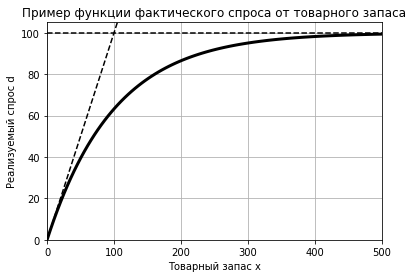

In [1]:
import matplotlib.pyplot as plt
import numpy as np

D = 100.
x_l, x_u = 0.0, 500.
x = np.linspace(x_l, x_u, 100)
d = D * (1. - np.exp(-x / D))
plt.plot(x, d, c='k', lw=3)
plt.axhline(D, c='k', ls='--')
plt.plot([0, 1.05 * D], [0, 1.05 * D], c='k', ls='--')
plt.xlim(x_l, x_u)
plt.ylim(0, 1.05 * D)
plt.xlabel('Товарный запас x')
plt.ylabel('Реализуемый спрос d')
plt.title('Пример функции фактического спроса от товарного запаса')
plt.grid()
plt.show()

Имеется некоторый горизонт $T$ планирования закупки для поддержания товарооборота, предположим 1 неделя(еженедельные закупки).

Количетво уникальных товаров - $n$, они сформированны в группы по потребностям $g$, $|g| = m$ - количество групп, 
$g^{(j)}$ - содержит товары, принадлежащих группе с номером $j$, $|g^{(j)}|$ - размер группы

На начало периода имеется товарных запасов $x_{0, i}, i=1..n$ для каждой позиции

$D_{i}$ - уровень спроса при полной товарной достаточности/доступности (т.е. сколько бы у нас приобрели бы товара, если бы он был всегда доступен)

Так как количество товара не бесконесно, то реальный/фактический спрос будет зависеть от имеющихся запасов, в простейшем случае можно полагать, что реальный спрос, может быть описан так $d(x) = min(D, x)$.

В общем случае с учетом неопределенностей вид $d$ будет уже другой, но одни из основных свойств:

$d(x) \to x$, при $x \to 0$ - означает, что если товара немного, то он весь будет реализован

$d(x) \to D$, при $x \to \infty$ - означает, что полностью реализуется спрос на товар(не можем продать больше, чем могут купить, если по-простому)

Уровень сервиса $S$ - доля покрытия спроса $D$ имеющимися запасами, $S = \cfrac{d}{D}$

Оценка оборачиваемости $K$ - характерное время, в течение которого распродается остаток $x$, $K = T \cdot \cfrac{x}{D}$

$I$ - бюджет под закупки на период $T$

для каждого товара $i$:

$P_{i}$ - цена товара

$C_{i}$ - себестоимость товара(считаем, что текущие остатки имеют такую же себестоимость что и при закупке)

$R_{i} = P_{i} \cdot d_{i}(x_{i})$ - выручка за период $T$

$M_{i} = (P_{i} - C_{i}) \cdot d_{i}(x_{i})$ - маржа за период $T$

$M^{(p)}_{i} = \cfrac{M_{i}}{P_{i}}$ - маржинальность в процентах от выручки



##### Постановка A
Имеется бюджет на закупки $I$

Максимизиовать один из показателей $R$, $M$, удерживая другой не ниже заданного уровня($M_{0}$, $R_{0}$).

Альтернатива - максимизировать $R$, поддерживая определенный уровень маржинальности $M^{(p)}$

Поддерживать уровень сервиса в каждой группе не ниже заданного $S_{j}$ (покрытие спроса)

Не превышать оборачиваемость для каждого товара выше заданного уровня $K_{i}$ (снижение рисков получения олд-стоков)

Итого вариант A

$$M = \sum_{i=1}^{n} (P_{i} - C_{i}) \cdot d_{i}(x_{i}) \to max$$

$$R = \sum_{i=1}^{n} P_{i} \cdot d_{i}(x_{i}) \geqslant R_{0}$$

$$\sum_{i=1}^{n} C_{i} \cdot (x_{i} - x^{(0)}_{i}) \leqslant I$$

$$\sum_{i \in g_{j}} d_{i}(x_{i}) \geqslant  S_{j} \cdot \sum_{i \in g_{j}} D_{i}, \ \ \ j = 1..|g|$$

$$x_{i} \leqslant \frac{K_{i} \cdot D_{i}}{T}, \ \ \ i=1..n$$


##### Постановка B
Поддерживать выручку и маржу не ниже заданного уровня $R_{0}$, $M_{0}$

Поддерживать уровень сервиса в каждой группе не ниже заданного $S_{j}$

Не превышать оборачиваемость для каждого товара выше заданного уровня $K_{i}$

Подобрать такой вариант, при котором бюджет на закупку будет минимален

$$I = \sum_{i=1}^{n} C_{i} \cdot (x_{i} - x^{(0)}_{i}) \to min$$

$$M = \sum_{i=1}^{n} (P_{i} - C_{i}) \cdot d_{i}(x_{i}) \geqslant M_{0}$$

$$R = \sum_{i=1}^{n} P_{i} \cdot d_{i}(x_{i}) \geqslant R_{0}$$

$$\sum_{i \in g_{j}} d_{i}(x_{i}) \geqslant  S_{j} \cdot \sum_{i \in g_{j}} D_{i}, \ \ \ j = 1..|g|$$

$$x_{i} \leqslant \frac{K_{i} \cdot D_{i}}{T}, \ \ \ i=1..n$$
